In [1]:
# API für die Abfrage von Länderflaggen
# der folgende Code füllt die DB (Tabelle land) mit den Flaggen ab
# Stefan Sidler, 19.03.2024 (Aktualisiert 02.04.2024)
# quelle API: https://www.welt-flaggen.de/herunterladen/api

In [7]:
# Verbindung zur PostgreSQL-DB aufbauen

import requests
import psycopg2
from io import BytesIO

# Verbindung zur PostgreSQL-Datenbank herstellen
conn = psycopg2.connect(
    dbname="footballmap",
    user="postgres",
    password="xxx",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

In [9]:
# gemäss Ländercodeliste des API codes wurden das Attribut "ländercode" abgefüllt
# einige Länder mussten manuell ergänzt werden, da die Schreibweise des Namens nicht identisch war

# API-Link für die Ländercodes abrufen
api_url = "https://flagcdn.com/en/codes.json"
response = requests.get(api_url)
country_codes = response.json()

# Durch die Länder in der API iterieren und die Ländercodes in der Datenbank aktualisieren
for code, name in country_codes.items():
    # SQL-Abfrage zum Aktualisieren des Ländercodes basierend auf dem Ländernamen
    sql_query = "UPDATE Land SET ländercode = %s WHERE name = %s"
    cur.execute(sql_query, (code, name))

# Transaktion bestätigen
conn.commit()


In [13]:
# gesamte Tabelle "land" durchgehen un mit Flaggen gemäss der API abfüllen (Verknüpfung via Ländercode)

# API-Link für Ländercodes
country_codes_url = "https://flagcdn.com/en/codes.json"
# Basis-URL für die Flaggen-Abfrage
flags_base_url = "https://flagcdn.com/h240/"

try:
    # Ländercodes abrufen
    response = requests.get(country_codes_url)
    country_codes = response.json()

    # Für jedes Land die Flagge herunterladen und in die Datenbank einfügen
    for code, name in country_codes.items():
        # Flaggen-URL für das aktuelle Land
        flag_url = f"{flags_base_url}/{code}.png"
        
        # Flagge herunterladen
        flag_response = requests.get(flag_url)
        
        if flag_response.status_code == 200:
            flag_data = flag_response.content
            # SQL-Statement zum Einfügen der Flagge in die Tabelle
            cur.execute(
                "UPDATE Land SET flagge = %s WHERE ländercode = %s",
                (psycopg2.Binary(flag_data), code)
            )
            print(f"Flagge für {name} erfolgreich eingefügt.")
        else:
            print(f"Fehler beim Abrufen der Flagge für {name}.")

    # Transaktion bestätigen
    conn.commit()
except Exception as e:
    # Transaktion rückgängig machen und Fehler ausgeben
    conn.rollback()
    print("Fehler:", e)



Flagge für Andorra erfolgreich eingefügt.
Flagge für United Arab Emirates erfolgreich eingefügt.
Flagge für Afghanistan erfolgreich eingefügt.
Flagge für Antigua and Barbuda erfolgreich eingefügt.
Flagge für Anguilla erfolgreich eingefügt.
Flagge für Albania erfolgreich eingefügt.
Flagge für Armenia erfolgreich eingefügt.
Flagge für Angola erfolgreich eingefügt.
Flagge für Antarctica erfolgreich eingefügt.
Flagge für Argentina erfolgreich eingefügt.
Flagge für American Samoa erfolgreich eingefügt.
Flagge für Austria erfolgreich eingefügt.
Flagge für Australia erfolgreich eingefügt.
Flagge für Aruba erfolgreich eingefügt.
Flagge für Åland Islands erfolgreich eingefügt.
Flagge für Azerbaijan erfolgreich eingefügt.
Flagge für Bosnia and Herzegovina erfolgreich eingefügt.
Flagge für Barbados erfolgreich eingefügt.
Flagge für Bangladesh erfolgreich eingefügt.
Flagge für Belgium erfolgreich eingefügt.
Flagge für Burkina Faso erfolgreich eingefügt.
Flagge für Bulgaria erfolgreich eingefügt.
F

In [8]:
# Spalte "flagge_link" abfüllen

update_query = """
    UPDATE Land
    SET flagge_link = 'https://flagcdn.com/h240/' || ländercode || '.png';
"""

try:
    # Update-Befehl ausführen
    cur.execute(update_query)
    
    # Transaktion bestätigen
    conn.commit()
    
    print("Die Spalte flagge_link wurde erfolgreich aktualisiert.")
    
except Exception as e:
    # Transaktion rückgängig machen und Fehler ausgeben
    conn.rollback()
    print("Fehler beim Aktualisieren der Spalte flagge_link:", e)

Die Spalte flagge_link wurde erfolgreich aktualisiert.


In [9]:
# die Flaggen werden von der DB (BLOB) lokal auf dem PC abgespeichert (als .png-Datei)

import os

# Verzeichnis zum Speichern der PNG-Dateien festlegen
output_directory = "C:/Users/ssidl/Documents/_Projekte_FHNW_Lokal/Semester_6/GeoInformatik/png/Flaggen"

# SQL-Abfrage vorbereiten, um Blob-Daten abzurufen
select_query = """
    SELECT flagge, ländercode
    FROM Land
"""

try:
    # Abfrage ausführen
    cur.execute(select_query)
    
    # Ergebnisse abrufen
    rows = cur.fetchall()
    
    # Für jede Zeile das Blob-Objekt als PNG-Datei speichern
    for row in rows:
        flag_blob = row[0]
        country_code = row[1]
        filename = f"{country_code}.png"
        filepath = os.path.join(output_directory, filename)
        
        # Blob-Daten in eine PNG-Datei schreiben
        with open(filepath, 'wb') as f:
            f.write(flag_blob)
        
        print(f"Flagge für {country_code} wurde als {filename} gespeichert.")
    
except Exception as e:
    print("Fehler beim Abrufen und Speichern der Flaggen:", e)

Flagge für us wurde als us.png gespeichert.
Flagge für cn wurde als cn.png gespeichert.
Flagge für ao wurde als ao.png gespeichert.
Flagge für sl wurde als sl.png gespeichert.
Flagge für si wurde als si.png gespeichert.
Flagge für so wurde als so.png gespeichert.
Flagge für ru wurde als ru.png gespeichert.
Flagge für sz wurde als sz.png gespeichert.
Flagge für be wurde als be.png gespeichert.
Flagge für cg wurde als cg.png gespeichert.
Flagge für dk wurde als dk.png gespeichert.
Flagge für sm wurde als sm.png gespeichert.
Flagge für sv wurde als sv.png gespeichert.
Flagge für gb-wls wurde als gb-wls.png gespeichert.
Flagge für so wurde als so.png gespeichert.
Flagge für sc wurde als sc.png gespeichert.
Flagge für sy wurde als sy.png gespeichert.
Flagge für ae wurde als ae.png gespeichert.
Flagge für ht wurde als ht.png gespeichert.
Flagge für bb wurde als bb.png gespeichert.
Flagge für kn wurde als kn.png gespeichert.
Flagge für is wurde als is.png gespeichert.
Flagge für li wurde als 

In [ ]:
# Spalte "flagge_pfad" abfüllen
# auf der DB den folgenden SQL-Befehl ausführen (Pfad bei Bedarf anpassen)

UPDATE Land
SET flagge_pfad = replace('C:\Users\ssidl\Documents\_Projekte_FHNW_Lokal\Semester_6\GeoInformatik\png\Flaggen\' || ländercode || '.png', '\', '/');

In [37]:
# einzelnes Land updaten, wenn der Ländercode in PG-Admin gewechselt hat (z.B. Isles of Scilly)
# zuvor in PG-Admin den Code wechseln, z.B.:
# UPDATE land SET ländercode = 'gb' WHERE name = 'Isles of Scilly';

# API-Link für Ländercodes
country_codes_url = "https://flagcdn.com/en/codes.json"
# Basis-URL für die Flaggen-Abfrage
flags_base_url = "https://flagcdn.com/h240/"

# Ausgewähltes Land
selected_country_code = "gb" #Land wählen (code)
    
if selected_country_code:
    flag_url = f"{flags_base_url}/{selected_country_code}.png"
    
    # Flagge herunterladen
    flag_response = requests.get(flag_url)
    
    if flag_response.status_code == 200:
        flag_data = flag_response.content
        # SQL-Statement zum Aktualisieren der Flagge in der Tabelle
        cur.execute(
            "UPDATE Land SET flagge = %s WHERE ländercode = %s",
            (psycopg2.Binary(flag_data), selected_country_code)
        )
        print(f"Flagge für {selected_country_code} erfolgreich aktualisiert.")
    else:
        print(f"Fehler beim Abrufen der Flagge für {selected_country_code}.")
else:
    print(f"Ländercode für {selected_country_code} nicht gefunden.")

# Transaktion bestätigen
conn.commit()


Flagge für gb erfolgreich aktualisiert.


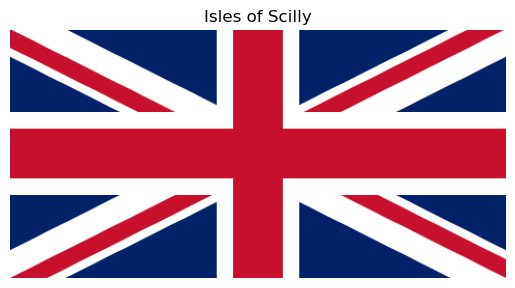

In [38]:
# Flagge abfragen (pro Land)

import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# SQL-Abfrage zum Abrufen des Namens und der Flagge eines bestimmten Landes
cur.execute("SELECT name, flagge FROM Land WHERE name = %s", ('Isles of Scilly',)) #Land eingeben

# Ergebnis abrufen
row = cur.fetchone()

if row:
    name, flag_data = row
    # Flagge anzeigen
    img = Image.open(BytesIO(flag_data))
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
    plt.show()
else:
    print("Land nicht gefunden.")



In [39]:
# weitere Daten abfragen (pro Land)


# SQL-Abfrage zum Abrufen der Attribute name und land_id aus der Tabelle Land
cur.execute("SELECT land_id, ländercode, name FROM land WHERE name = %s", ('Isles of Scilly',)) #Land eingeben")

# Alle Datensätze abrufen
rows = cur.fetchall()

# Alle Datensätze ausgeben
for row in rows:
    print(row)


(210, 'gb', 'Isles of Scilly')


In [10]:
# Verbindung schließen
cur.close()
conn.close()